In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

In [8]:
import matplotlib

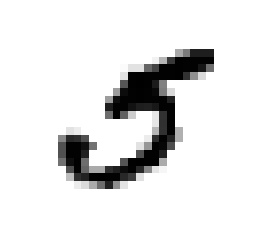

In [9]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")
plt.axis("off")
plt.show()

In [10]:
y[36000]

5.0

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Binary Classifier

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgd_cl = SGDClassifier(random_state =42)

In [16]:
sgd_cl.fit(X_train, y_train_5)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [17]:
sgd_cl.predict([some_digit])

array([ True], dtype=bool)

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [19]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [20]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_cl)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))
    

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.95755


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9455


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96455


## Measuring Acurancy Using Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(sgd_cl, X_train, y_train_5, cv=3, scoring= "accuracy")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt

array([ 0.95755,  0.9455 ,  0.96455])

In [23]:
from sklearn.base import BaseEstimator

In [24]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [25]:
never_5_cl = Never5Classifier()
cross_val_score(never_5_cl, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9106 ,  0.9077 ,  0.91065])

## Confusion Matrix

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
y_train_pred = cross_val_predict(sgd_cl, X_train, y_train_5, cv=5)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_5, y_train_pred)

array([[54034,   545],
       [ 2044,  3377]])

## Precision and recall

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_train_5, y_train_pred)

0.86104028556858747

In [32]:
recall_score(y_train_5, y_train_pred)

0.62294779560966607

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_5, y_train_pred)

0.72289414534945939

In [35]:
y_scores = sgd_cl.decision_function([some_digit])
y_scores

array([ 158376.35326211])

In [36]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [37]:
threshold = 0 
y_some_digit_pred = (y_scores < threshold)
y_some_digit_pred

array([False], dtype=bool)

In [38]:
y_scores = cross_val_predict(sgd_cl, X_train, y_train_5, cv=3,
                            method ="decision_function")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt

In [39]:
from sklearn.metrics import precision_recall_curve

In [40]:
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [41]:
def plot_precision_recall_vs_thresholds(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc = "best")
    plt.ylim([0,1])

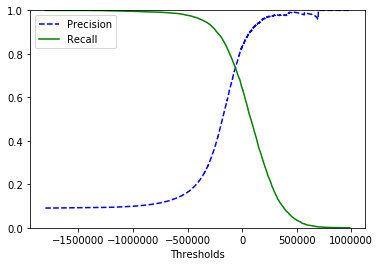

In [42]:
plot_precision_recall_vs_thresholds(precision, recall, thresholds)
plt.show()

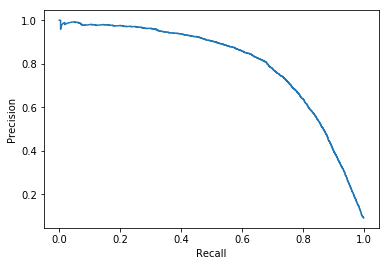

In [43]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [44]:
y_train_pred_90 = (y_scores> 90000)

In [45]:
precision_score(y_train_5, y_train_pred_90)

0.90931202223766505

In [46]:
recall_score(y_train_5, y_train_pred_90)

0.48275225973067698

## ROC curve

In [47]:
from sklearn.metrics import roc_curve

In [48]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    

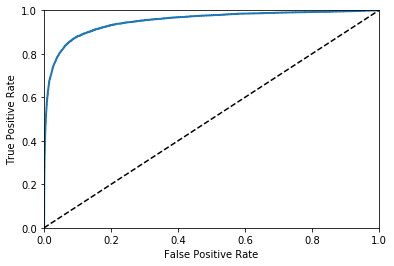

In [50]:
plot_roc_curve(fpr, tpr)
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_train_5, y_scores)

0.95064578081012174

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_cl = RandomForestClassifier(random_state=42)

In [55]:
y_proba_rf = cross_val_predict(rf_cl, X_train, y_train_5, cv=3,
                             method="predict_proba")

In [56]:
y_score_rf = y_proba_rf[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_score_rf)

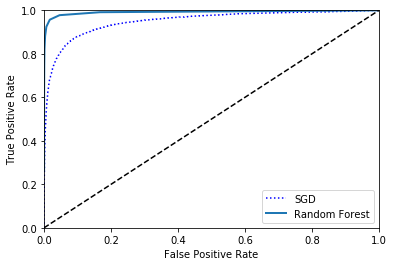

In [57]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc = "best")
plt.show()

In [58]:
roc_auc_score(y_train_5, y_score_rf)

0.99209855105315725

## Multiclass Clasification

In [59]:
sgd_cl.fit(X_train, y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [60]:
sgd_cl.predict([some_digit])

array([ 5.])

In [61]:
some_digit_score = sgd_cl.decision_function([some_digit])
some_digit_score

array([[-234671.54183666, -479737.36981694, -446077.92881944,
        -192957.72035518, -347884.02827232,  158376.35326211,
        -819611.42519739, -494221.77456541, -815891.67472215,
        -647161.28854014]])

In [62]:
np.argmax(some_digit_score)


5

In [63]:
sgd_cl.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [64]:
from sklearn.multiclass import OneVsOneClassifier

In [65]:
ovo_cl = OneVsOneClassifier(SGDClassifier(random_state=42))

In [66]:
ovo_cl.fit(X_train, y_train)
ovo_cl.predict([some_digit])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt

array([ 5.])

In [67]:
len(ovo_cl.estimators_)

45

In [68]:
rf_cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [69]:
rf_cl.predict([some_digit])

array([ 5.])

In [70]:
rf_cl.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

In [71]:
cross_val_score(sgd_cl, X_train, y_train, cv=3,
               scoring="accuracy")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt

array([ 0.85792841,  0.87189359,  0.86007901])

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_cl, X_train_scl, y_train, cv=3,
               scoring ="accuracy")

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt

array([ 0.91086783,  0.90869543,  0.90853628])

## Error analysis

In [74]:
y_train_pred = cross_val_predict(sgd_cl, X_train_scl, y_train, cv=3)
conf_mx= confusion_matrix(y_train, y_train_pred)
conf_mx

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt

array([[5726,    4,   24,   11,   10,   51,   46,    9,   38,    4],
       [   2, 6491,   43,   23,    6,   41,    6,   13,  107,   10],
       [  57,   36, 5331,  105,   87,   22,   93,   59,  154,   14],
       [  47,   46,  139, 5333,    1,  227,   35,   62,  137,  104],
       [  23,   29,   36,    5, 5358,    7,   49,   33,   81,  221],
       [  71,   40,   33,  181,   72, 4601,  108,   27,  178,  110],
       [  38,   29,   46,    1,   52,   91, 5614,    8,   39,    0],
       [  23,   25,   68,   27,   50,   12,    3, 5817,   15,  225],
       [  54,  152,   84,  162,   13,  157,   56,   28, 5002,  143],
       [  46,   31,   30,   83,  161,   30,    2,  201,   76, 5289]])

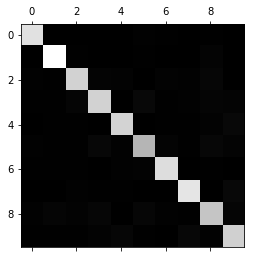

In [75]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [76]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sum

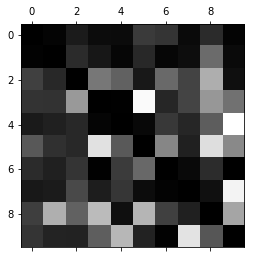

In [77]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [78]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [81]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

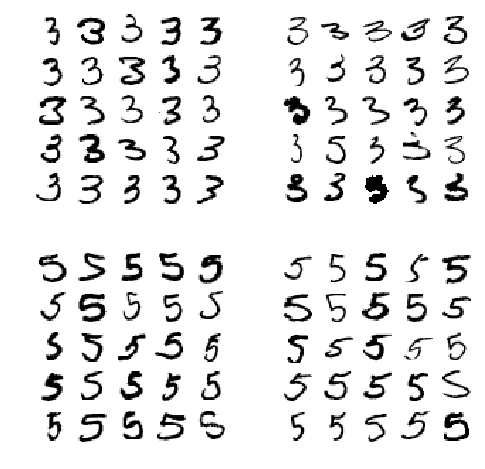

In [82]:
plt.figure(figsize = (8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Multilabel Classification

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)

y_multilabel = np.c_[y_train_large, y_train_odd] 

In [85]:
knn_cl = KNeighborsClassifier()
knn_cl.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
knn_cl.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_cl, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro") 

In [ ]:
y_train_knn_pred = cross_val_predict(knn_cl, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="weighted")

## Multioutput Classification

In [ ]:
noise = rnd.randint(0, 100, (len(X_train), 784))
noise2 = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod X_test + noise2
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_cl.fit(X_train_mod, y_train_mod)
clean_digit = knn_cl.predict([X_test_mod[some_index]])
plot_digit(clean_digit)